In [4]:
import os 

path, dirs, files = next(os.walk('train'))


print('There is')
print(len(files))
print('files')

There is
25000
files


In [5]:
file_names = os.listdir('train')[:2000]
print(file_names[0])

dog.8011.jpg


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


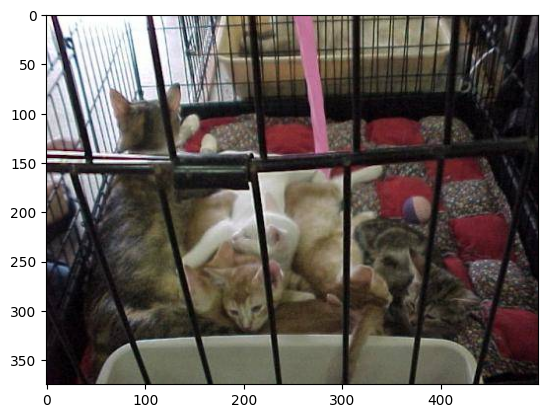

In [7]:
cat = mpimg.imread('train/cat.10090.jpg')
plt.imshow(cat)
plt.show()

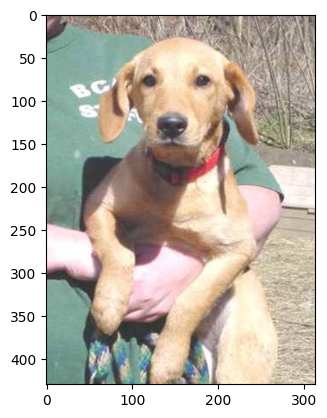

In [8]:
dog = mpimg.imread('train/dog.10145.jpg')
plt.imshow(dog)
plt.show()

In [9]:
dog_files = []
cat_files = []

labels = []

for file_name in file_names:
    if file_name.startswith('cat'):
        cat_files.append(file_name)

        labels.append(0)

    elif file_name.startswith('dog'):
        dog_files.append(file_name)

        labels.append(1)

print(len(cat_files))
print(len(dog_files))

        


986
1014


In [10]:
# import PIL

# for file_name in file_names:
#     img = PIL.Image.open('train/' + file_name)
#     img.resize((224, 224))
#     img = img.convert('RGB')

#     img.save('resized/' + file_name)

In [11]:
import cv2
import glob
import numpy as np

dog_cat_images = []

for file_name in file_names:
    dog_cat_images.append(cv2.imread('resized/' + file_name))

dog_cat_images = np.asarray(dog_cat_images)

In [12]:
from sklearn.model_selection import train_test_split

labels = np.asarray(labels)

X_train, X_test, Y_train, Y_test = train_test_split(dog_cat_images, labels, test_size= 0.2, random_state=2)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [13]:
import tensorflow as tf 
import tensorflow_hub as hub 

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)


In [14]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()


model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [39]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =',score)
print('Test Accuracy =', acc)



13/13 [==============================] - 2s 146ms/step - loss: 0.7156 - acc: 0.6050
Test Loss = 0.715565025806427
Test Accuracy = 0.6050000190734863


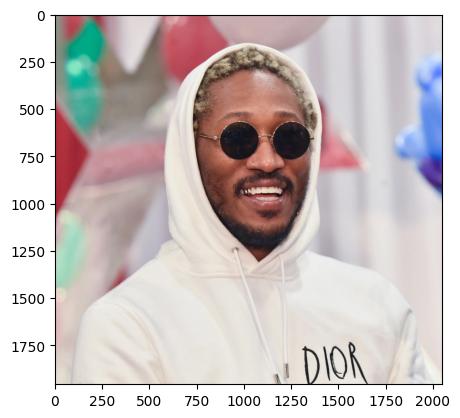

In [53]:
test_image = int(input("Give me a number between 1 and 12500"))

user_image = mpimg.imread('test1/{}.jpg'.format(test_image))
plt.imshow(user_image)
plt.show()
 

In [54]:
input_image = cv2.imread('test1/{}.jpg'.format(test_image))

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[1.2067559  0.91503984]]


In [55]:
cat_or_dog = np.argmax(input_prediction)

print(cat_or_dog)

if cat_or_dog == 0:
    print("🐱")

elif cat_or_dog == 1:
    print("🐶")


0
🐱
